<a href="https://colab.research.google.com/github/mors119/Data-Analysis-with-Open-Source/blob/main/%EC%A4%91%EA%B0%84%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 문제 1. API 인증키 발급 및 데이터 수집 (10점)
서울시 에코마일리지 에너지사용량 통계정보 Open API를 활용하여 데이터를 수집하시오.

#### 1-1. 서울시 에코마일리지 에너지사용량 통계정보 Open API를(https://data.seoul.go.kr/dataList/OA-15361/S/1/datasetView.do )에서 API 신청 과정을 거쳐 인증키를 발급받고, 발급받은 인증키 정보를 포함한 화면을 캡처하여 첨부하시오. (3점)


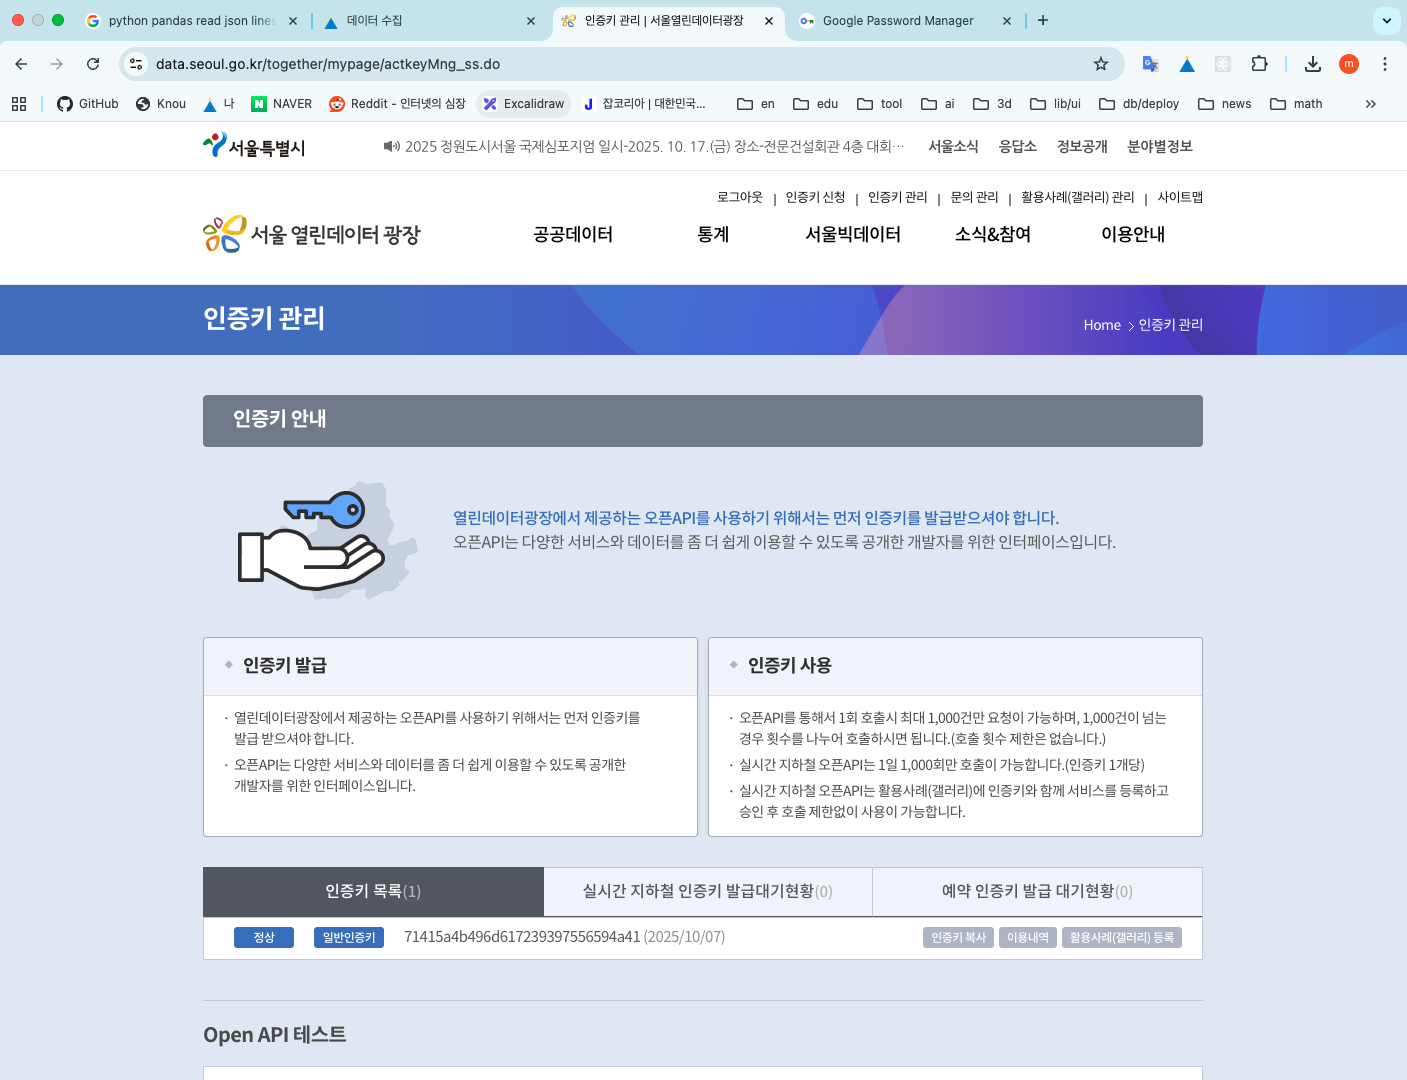

In [ ]:
from IPython.display import Image, display

display(Image(filename='sub(1).png'))


#### 1-2. Python을 사용하여 API를 호출하는 코드를 작성하고, 2015년 1월부터 2024년 12월까지의 개인 유형의 현년 전기, 가스, 수도, 지역난방 에너지 사용량 데이터를 수집하는 프로그램을 작성하시오. API 호출 성공을 확인할 수 있는 실행 결과를 캡처하여 첨부하시오. (7점)
월별 json 데이터 수집은 다음의 url 형식을 사용
- http://openapi.seoul.go.kr:8088/{본인의 API 키}/json/energyUseDataSummaryInfo/1/5/{연도}/{월}
- 예시 (2015년 1월) :
http://openapi.seoul.go.kr:8088/{본인의 API 키}/json/energyUseDataSummaryInfo/1/5/2015/01


In [ ]:
from copy import Error
import requests
import pprint

# API key
KEY = '71415a4b496d617239397556594a41'

# API 호출 함수
def request_api_rows(api_key: str, start: int = 1, end: int = 5, year: int = None, mon: int = None):
    test_message = False

    if year is None or mon is None:
        year, mon = '2015', '01'
        test_message = True

    # 타입 및 형태 보장
    year = str(year)
    mon = str(mon).zfill(2)

    url = f'http://openapi.seoul.go.kr:8088/{api_key}/json/energyUseDataSummaryInfo/{start}/{end}/{year}/{mon}'

    try:
        # get 요청
        response = requests.get(url, timeout=10)
        # 404 등 예외처리
        response.raise_for_status()

        # json 파싱
        data = response.json()

        # 실제 데이터 row 리스트 꺼내기(없으면 빈 리스트)
        rows = data.get('energyUseDataSummaryInfo', {}).get('row', [])

        if test_message & len(rows) > 0:
            if response.status_code == 200:
                print("API 호출 성공")
                return pprint.pprint(rows)

        return rows
    except Error as e:
        return print(f'API 호출 실패\n에러 발생: {e}')

request_api_rows(KEY)

API 호출 성공
[{'CNT': '767791',
  'ECO2_1': '-6090964',
  'ECO2_2': '-2582568.736',
  'EUS': '193784708',
  'EUS1': '194781915',
  'EUS2': '204969429',
  'GCO2_1': '-3597086',
  'GCO2_2': '-8057472.64',
  'GUS': '59133720',
  'GUS1': '57163993',
  'GUS2': '68297619',
  'HCO2_1': '-2504435.652',
  'HCO2_2': '-33660084.213069',
  'HUS': '22740838.937',
  'HUS1': '23400055.303',
  'HUS2': '27090493.875',
  'MM_TYPE': '개인',
  'MON': '01',
  'REG_DATE': '2015-06-04 17:03:55.0',
  'WCO2_1': '8179.308',
  'WCO2_2': '2715.530256',
  'WUS': '12819757.886',
  'WUS1': '12723680.426',
  'WUS2': '12899476.73',
  'YEAR': '2015'},
 {'CNT': '1382',
  'ECO2_1': '-2178902',
  'ECO2_2': '-923854.448',
  'EUS': '134955565',
  'EUS1': '128707423',
  'EUS2': '145561511',
  'GCO2_1': '-470995',
  'GCO2_2': '-1055028.8',
  'GUS': '9107197',
  'GUS1': '8410968',
  'GUS2': '10745416',
  'HCO2_1': '0',
  'HCO2_2': '0',
  'HUS': '0',
  'HUS1': '0',
  'HUS2': '0',
  'MM_TYPE': '학교',
  'MON': '01',
  'REG_DATE': '2015

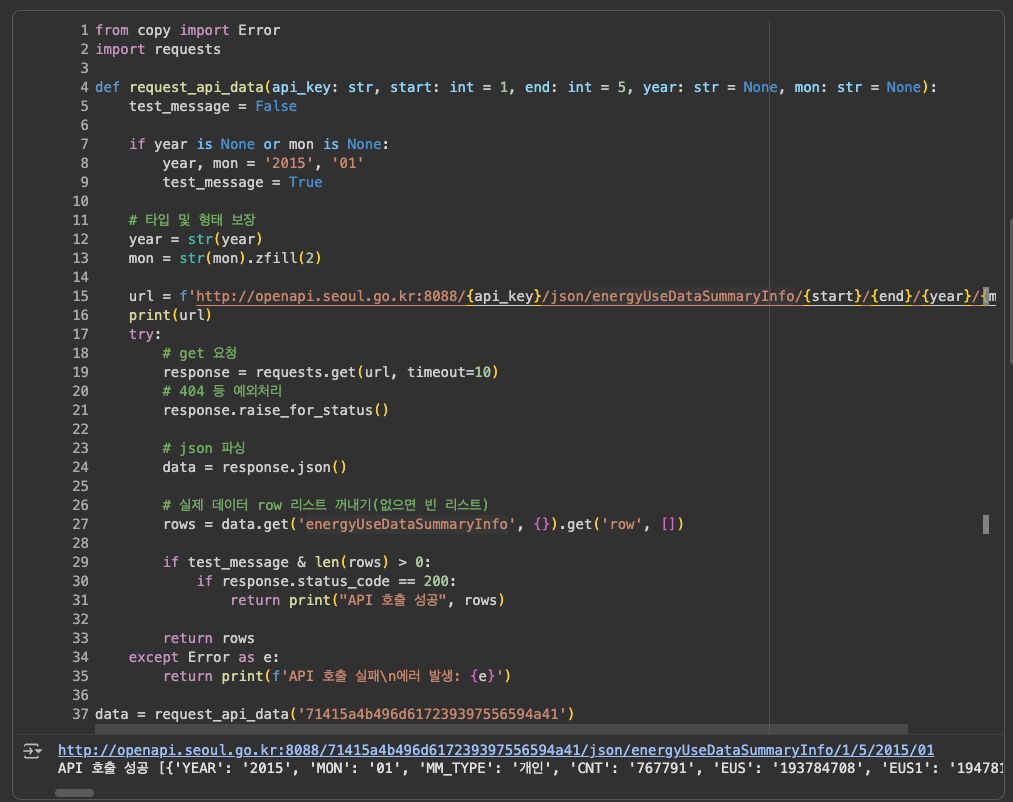

In [ ]:
display(Image(filename='sub(2).png'))

# 문제 2. 데이터 변환 및 전처리 (8점)
수집한 데이터를 분석에 적합한 형태로 변환하시오.



#### 2-1. 수집한 JSON 형태의 데이터를 pandas DataFrame으로 변환하고, 데이터의 기본 정보를 출력하는 코드와 실행 결과를 첨부하시오. (4점)


In [ ]:
import pandas as pd

# 설정한 연도 별 데이터 가져오기
def get_data_by_year(start_year: int, end_year: int):
    data = []
    for year in range(start_year, end_year + 1):
        for month in range(1, 12 + 1):
            rows = request_api_rows(KEY, 1, 2, year, month)
            # 빈값과 리스트 속 리스트 방지
            if rows:
                data.extend(rows)
    return data

# 데이터 수집
data = get_data_by_year(2015, 2015)
# 데이터 변환
df = pd.DataFrame(data)
# 기본 정보 출력
df.head()

,YEAR,MON,MM_TYPE,CNT,EUS,EUS1,EUS2,ECO2_1,ECO2_2,GUS,...,WUS1,WUS2,WCO2_1,WCO2_2,HUS,HUS1,HUS2,HCO2_1,HCO2_2,REG_DATE
0,2015,01,개인,767791,193784708,194781915,204969429,-6090964,-2582568.736,59133720,...,12723680.426,12899476.73,8179.308,2715.530256,22740838.937,23400055.303,27090493.875,-2504435.652,-33660084.213069,2015-06-04 17:03:55.0
1,2015,01,학교,1382,134955565,128707423,145561511,-2178902,-923854.448,9107197,...,2097433.8,2133200.8,-39498.1,-13113.3692,0,0,0,0,0,2015-06-04 17:03:55.0
2,2015,02,개인,774620,189974230,193611430,200055533,-6859251.5,-2908322.636,56487358,...,12713146.172,12948410.081,-173889.9085,-57731.449622,18793320.213,19032221.757,21414367.325,-1429974.328,-17311712.76832,2015-06-04 16:59:30.0
3,2015,02,기업,16966,523325778,542435234,567181200,-31482439,-13348554.136,32508993,...,6853247.6,7071961.8,-102743.9,-34110.9748,0,0,0,0,0,2015-06-04 16:59:30.0
4,2015,03,학교,3903,145577747,140333207,148915260,673170,285424.08,7601585,...,2622179.4,2793577,-137612.4,-45687.3168,48,34,41,10.5,41.811,2015-06-12 04:00:01.0



#### 2-2. 연도별, 계절별 분석을 위해 날짜 컬럼을 활용하여 연도(year)와 계절(season) 컬럼을 추가하는 전처리 코드를 작성하고, 변환 결과를 확인할 수 있는 출력 결과를 첨부하시오.
※ 계절 구분: 봄(3-5월), 여름(6-8월), 가을(9-11월), 겨울(12-2월) (4점)


In [ ]:
# 결측치 확인 및 0으로 교체
# df.isnull().sum().sum()
# df = df.fillna(0)
# 년도 데이터는 이미 있으므로 전처리가 필요하지 않음.

def mon_to_season(mon):
    m = int(mon)
    if   3 <= m <= 5:  return '봄'
    elif 6 <= m <= 8:  return '여름'
    elif 9 <= m <= 11: return '가을'
    else:               return '겨울'

df['SEASON'] = df['MON'].apply(mon_to_season)

df[['SEASON', 'MON']].head()


,SEASON,MON
0,겨울,01
1,겨울,01
2,겨울,02
3,겨울,02
4,봄,03



# 문제 3. 데이터 시각화 (8점)
전처리된 데이터를 활용하여 다음의 시각화를 수행하시오.


In [ ]:
# 한글 처리
!sudo apt-get install -y fonts-nanum
!sudo fc-cache –fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (12.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126675 files and direc

- 런타임 -> 세션 다시 시작

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

#### 3-1. 연도별 에너지 사용 총 사용량(전기+가스+수도+지역난방) 변화량을 선 그래프로 시각화하고,그래프에 자신의 학번 뒤 4자리를 제목에 포함하여 저장하시오. (예: "연도별 에너지 사용 총액 변화 - 1234") 시각화 코드와 생성된 그래프를 첨부하시오. (4점)


Text(0, 0.5, '에너지 사용량')

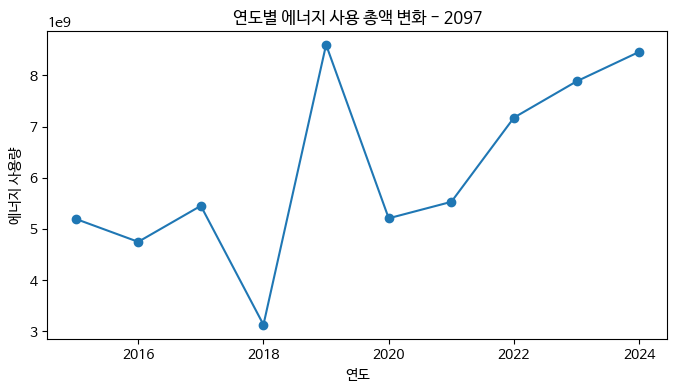

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 컬럼 보기
df.keys()
# 에너지 관련 컬럼
# 'EUS', 'EUS1', 'EUS2', 'ECO2_1', 'ECO2_2', 'GUS', 'GUS1', 'GUS2', 'GCO2_1', 'GCO2_2',
# 'WUS', 'WUS1', 'WUS2', 'WCO2_1', 'WCO2_2', 'HUS', 'HUS1', 'HUS2', 'HCO2_1', 'HCO2_2'
energy = ['EUS', 'GUS', 'WUS', 'HUS']


# energy, YEAR을 숫자형으로 바꾸기 (년도를 숫자로 바꾸지 않으면 숫자형 컬럼을 고를 때 빠짐.)
df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce')
for c in energy:
    df[c] = pd.to_numeric(df[c], errors='coerce')

# 숫자형 컬럼만 고르기
num_cols = df.select_dtypes(include=[np.number]).columns
# 년도는 숫자 컬럼에서 제외하기
num_cols = [c for c in num_cols if c != 'YEAR']

# year로 그룹을 묶어서 number 값인 컬럼만 골라 합치기
yearly_sum = df.groupby('YEAR')[num_cols].sum().reset_index()

# 에너지만 모아서 (오류방지: 결측치를 제거하고) 더하기
yearly_sum['TOTAL'] = yearly_sum[energy].sum(axis=1, skipna=True)
# print(yearly_sum['TOTAL'])

plt.figure(figsize=(8,4))
plt.plot(yearly_sum['YEAR'], yearly_sum['TOTAL'], marker='o')
# plt.xticks(yearly_sum['YEAR'].tolist())

plt.title('연도별 에너지 사용 총액 변화 - 2097')
plt.xlabel('연도')
plt.ylabel('에너지 사용량')
plt.show()


#### 3-2. 계절별 가스 사용량 평균을 막대 그래프로 시각화하고, 각 막대에 구체적인 수치를 표시하시오. 시각화 코드와 생성된 그래프를 첨부하시오. (4점)


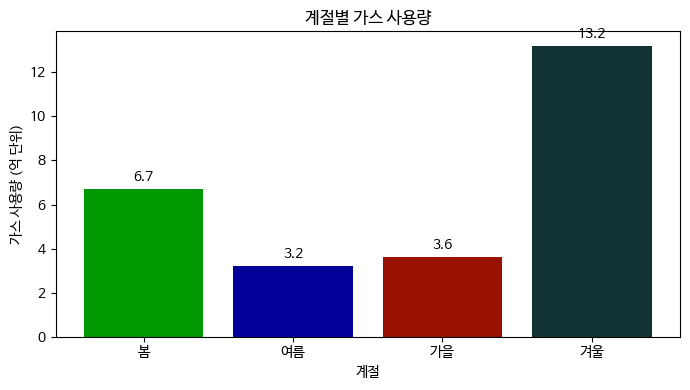

In [ ]:
# 순서 지정
order = ['봄', '여름', '가을', '겨울']
# SEASON을 카테고리형으로 바꿔 순서대로 정렬
df['SEASON'] = pd.Categorical(df['SEASON'], categories=order, ordered=True)

# 계절별 사용량 더하기
season_sum = (df.groupby('SEASON', observed=False)[num_cols].sum().reset_index())
# print(season_sum)
# 그래프 및 축 객체 생성
fig, ax = plt.subplots(figsize=(7, 4))
# 색상 선택
colors = ['#009900', '#000099', '#991100', '#113333']

# 억단위로 만들기
values_in_uk = (season_sum['GUS'] / 1e8).round(1)
bars = ax.bar(season_sum['SEASON'], values_in_uk, color=colors)

# 막대 라벨(소수점 1자리)
ax.bar_label(bars, labels=[f'{v:.1f}' for v in values_in_uk], padding=3)

# 부가 설명
ax.set_title('계절별 가스 사용량')
ax.set_xlabel('계절')
ax.set_ylabel('가스 사용량 (억 단위)')
plt.tight_layout()
plt.show()


# 문제 4. 데이터 분석 및 해석 (4점)
시각화 결과를 바탕으로 다음을 분석하고 설명하시오.


#### 4. 연도별 에너지 사용량 변화에서 나타나는 주요 트렌드를 찾아 분석하고, 그 원인을 추론하여 200자 이내로 설명하시오. (4점)

에너지 사용량을 보면 연속적이지는 않지만 유의미하게 증가하고 있습니다. 이를 통해 앞으로도 연료 사용량과 이산화탄소 배출량이 꾸준하게 증가할 것으로 보 입니다. 또한 2018년도는 에너지 사용량이 급감하고 2019년에는 에너지 사용량이 급증한 것으로 보아  2018년도는 다른 연도에 비해 따뜻했고, 2019년도에는 다른 연도에 비해 추웠을 것으로 예상됩니다.